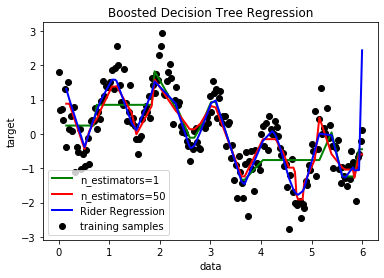

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.cos(6 * X).ravel() + rng.normal(0, 0.5, X.shape[0])
X_trian, X_test, y_train, y_test = train_test_split(X, y)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4, random_state=rng)  # CART回归树(树的最大深度为4),多个超参数需要在此处调节
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                           loss='linear',
                           # 可选:'linear'(默认,计算表达式为:np.abs(y_predict - y)), 'square', 'exponential'(指数损失函数)
                           n_estimators=50, random_state=rng)


def RidgeRegression(degree, alpha):
    """岭回归"""
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha, random_state=rng))
    ])


ridge1_reg = RidgeRegression(20, 0)  # 将岭回归的正则化项设置为0

regr_1.fit(X_trian, y_train)
regr_2.fit(X_trian, y_train)
ridge1_reg.fit(X_trian, y_train)

# Predict
y_1_test = regr_1.predict(X_test)
y_2_test = regr_2.predict(X_test)
ridge_y_test = ridge1_reg.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(np.sort(X_test, axis=0), y_1_test[np.argsort(X_test, axis=0)],
         c="g", label="n_estimators=1", linewidth=2)
plt.plot(np.sort(X_test, axis=0), y_2_test[np.argsort(X_test, axis=0)],
         c="r", label="n_estimators=50", linewidth=2)
plt.plot(np.sort(X_test, axis=0), ridge_y_test[np.argsort(X_test, axis=0)],
         c="b", label="Rider Regression", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [14]:
regr_1.score(X_test, y_test)  # R平方

0.4847316167107375

In [15]:
regr_2.score(X_test, y_test)  # R平方

0.7374331572439929

In [16]:
ridge1_reg.score(X_test, y_test)  # R平方

0.7118140762539258

In [17]:
j = 1
for i in regr_2.staged_predict(X_test):  # 不同数量的基本分类器组合时,X_test的预测输出
    print(str(j) + '个估计器时,predict输出为\n', i)
    j += 1

1个估计器时,predict输出为
 [ 0.68511215  0.68511215 -0.19842765 -0.19842765  0.63370259  0.00701234
  0.00701234  0.68511215 -1.5198628  -0.19842765  0.63370259  0.68511215
  1.77104028  1.77104028 -1.20411498  0.68511215  0.07792401  0.916549
 -1.5198628  -0.59609839  0.68511215 -0.19842765  0.916549   -1.20411498
 -1.5198628  -0.59609839  0.00701234  0.07792401 -1.5198628  -0.59609839
  0.38406134  0.38406134 -0.59609839  0.38406134 -1.27794569  0.68511215
  0.38406134 -1.5198628  -0.31983711 -1.27794569 -0.19842765 -0.19842765
  0.00701234  0.07792401 -0.31983711 -0.19842765 -1.5198628  -1.5198628
 -0.19842765  1.77104028]
2个估计器时,predict输出为
 [ 0.68511215  0.68511215 -0.19842765 -0.19842765  0.63370259  0.00701234
  0.00701234  0.68511215 -1.5198628  -0.19842765  0.63370259  0.68511215
  1.77104028  1.77104028 -1.20411498  0.68511215  0.07792401  0.916549
 -1.5198628  -0.59609839  0.68511215 -0.19842765  0.916549   -1.20411498
 -1.5198628  -0.59609839  0.00701234  0.07792401 -1.5198628  -0.5

In [18]:
regr_2.feature_importances_  # 特征的相对重要性(值越大,重要程度越高)

array([1.])